<a href="https://colab.research.google.com/github/eduardoheros/project-dataviz/blob/master/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture cap_out
!pip install biopython
!pip install py3Dmol
!jupyter labextension install jupyterlab_3dmol

In [0]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio import AlignIO
from Bio.PDB import PDBParser
import py3Dmol
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import gmean
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
drive.mount('/content/drive/',force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd "/content/drive/My Drive/Data COLAB/virus"

/content/drive/My Drive/Data COLAB/virus


In [0]:
lista_seq=['covid19.fasta','vih.fasta','viruela.fasta','sarampion.fasta','zika.fasta','ebola.fasta','influenza.fasta']

In [0]:
records_covid19=list(SeqIO.parse(lista_seq[0],"fasta"))

In [0]:
##Se eliminan secuencias incompletas
records_covid19.pop(0)
records_covid19.pop(10)

SeqRecord(seq=Seq('GATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATG...TGT', SingleLetterAlphabet()), id='MT370903.1', name='MT370903.1', description='MT370903.1 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/NY-PV08136/2020| complete genome', dbxrefs=[])

In [0]:
SeqIO.write(records_covid19,"covid19_completo.fasta","fasta")

11

In [0]:
alineamiento=AlignIO.read("COVID19.aln",format="fasta")

In [0]:
print(alineamiento)

SingleLetterAlphabet() alignment with 11 rows and 7096 columns
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QKE49072.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QKF30848.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QIX12193.2
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QKE11052.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QKI31224.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QJQ28103.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QKE43665.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QJZ27919.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QIZ16569.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QIU78765.1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQ...VNN gb|QJT43390.1


In [0]:
lista_alineamiento=[list(str(i.seq)) for i in alineamiento]

In [0]:
lista_alineamiento=np.array(lista_alineamiento)

In [0]:
aminoacidos_numeros={'A':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'K':9,'L':10,'M':11,'N':12,'P':13,'Q':14,'R':15,'S':16,'T':17,'V':18,'W':19,'Y':20,'X':21}

In [0]:
lista_alineamiento_num=[]
for i in lista_alineamiento:
  for j in i:
    x=aminoacidos_numeros[j]
    lista_alineamiento_num.append(x)

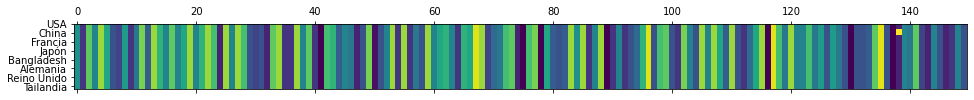

In [0]:
matriz_recortada=np.array(lista_alineamiento_num)
matriz_recortada=matriz_recortada.reshape(11,7096)
matriz_recortada=matriz_recortada[:,0:150]
plt.matshow(matriz_recortada)
plt.yticks(ticks=[-0.5,1,2.5,4,5.5,7,8.5,10],labels=["USA","China","Francia","Japón","Bangladesh","Alemania","Reino Unido","Tailandia"]);
plt.savefig("matriz_recordata.png",dpi=1000)

In [0]:
lista_alineamiento_num=np.array(lista_alineamiento_num).reshape(88,887)

<Figure size 18000x12000 with 0 Axes>

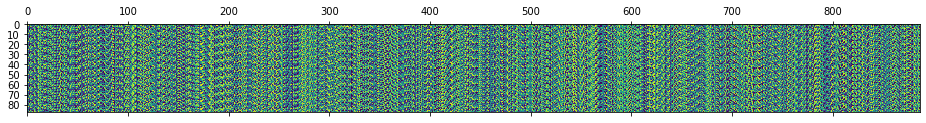

In [0]:
plt.figure(dpi=3000)
plt.matshow(lista_alineamiento_num)
plt.savefig('alineacion.png',dpi=1000)

In [0]:
view = py3Dmol.view(query='pdb:6lu7')
view.setStyle({'cartoon':{'color':'spectrum'}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [0]:
covid19=pd.DataFrame(list(str(alineamiento[0].seq)))
covid19["Frecuencia"]=1
covid19.columns=["Aminoácidos","Frecuencia"]
filtered=covid19.groupby(by="Aminoácidos",as_index=False)["Frecuencia"].sum()
filtered.sort_values(by="Frecuencia",ascending=False,inplace=True)

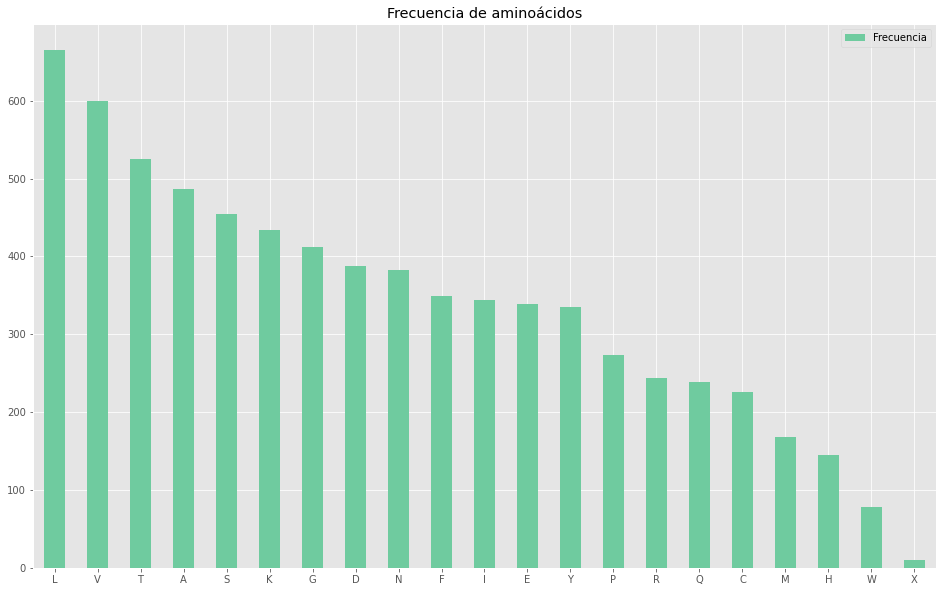

In [0]:
plt.style.use('ggplot')
colors=["#6fcb9f"]
filtered.plot.bar(rot=0,title="Frecuencia de aminoácidos",figsize=(10*1.618,10),color=colors)
xticks=filtered["Aminoácidos"]
xt_arange=np.arange(len(xticks))
plt.xticks(ticks=xt_arange,labels=xticks)
plt.savefig("Frecuencia aminoácidos.png",dpi=1000);

In [0]:
len(records_covid19[0])

29903

In [0]:
files=['vih.fasta','viruela.fasta','sarampion.fasta','zika.fasta','ebola.fasta','influenza.fasta']

In [0]:
records=[]
for i in files:
  x=list(SeqIO.parse(i,"fasta"))
  records.append(x)

In [0]:
nombres=['VIH','Viruela','Sarampión','Zika','Ebola','Influenza','COVID19']

In [0]:
longitud_bp=[]
for i in records:
  x=len(str(i[0].seq))
  longitud_bp.append(x)

In [0]:
longitud_bp.append(29903)

In [0]:
genoma_size=pd.DataFrame({"Virus":nombres,"Tamaño":longitud_bp})

In [0]:
genoma_size.sort_values(by="Tamaño",inplace=True)
genoma_size.set_index("Virus",inplace=True)

In [0]:
area=np.array(genoma_size.Tamaño.to_list())
area=area/5
genoma_size.index.to_list()
genoma_size["Tamaño"].to_list()

[2355, 9063, 10807, 15894, 18959, 29903, 185517]

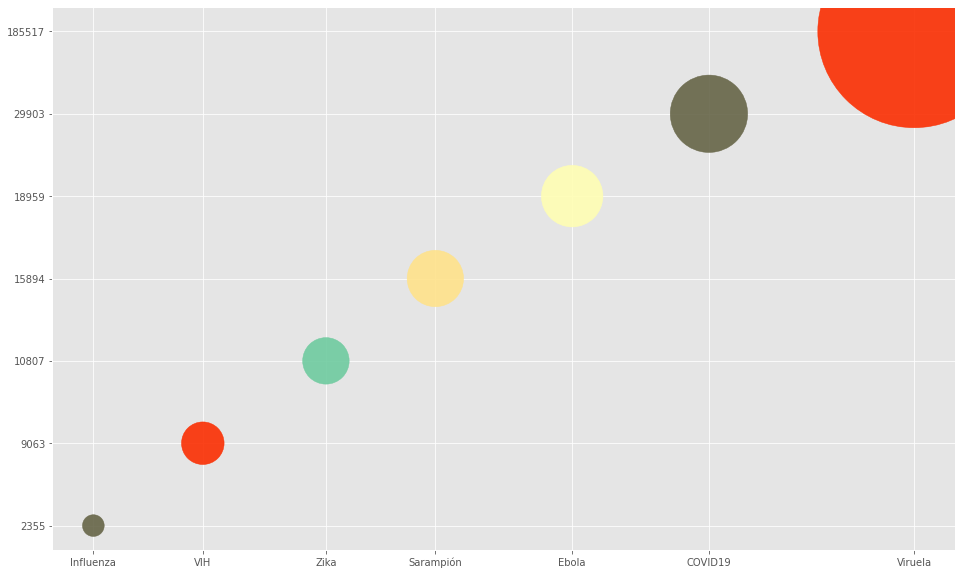

In [0]:
N = 7
x = np.array([0.1,0.18,0.27,0.35,0.45,0.55,0.7])
y = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
colors = ["#666547","#fb2e01","#6fcb9f","#ffe28a","#fffeb3","#666547","#fb2e01"]
#area=genoma_size
plt.figure(figsize=(1.618*10,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.9)
plt.xticks(ticks=x,labels=genoma_size.index.to_list())
plt.yticks(ticks=y,labels=genoma_size["Tamaño"].to_list())
plt.savefig("Tamaño genoma.png",dpi=1000)
plt.show()


In [0]:
###Cálculo R0
r0_range=[[2,5],[3.5,6],[12,18],[1.5,1.9],[1.4,2.8],[3.8,8.9]]
nombres_r0=['VIH','Viruela','Sarampión','Ebola','Influenza','COVID19']

In [0]:
r_cero=[]
for i in r0_range:
  x=gmean(i)
  r_cero.append(x)

In [0]:
arange=np.arange(15)

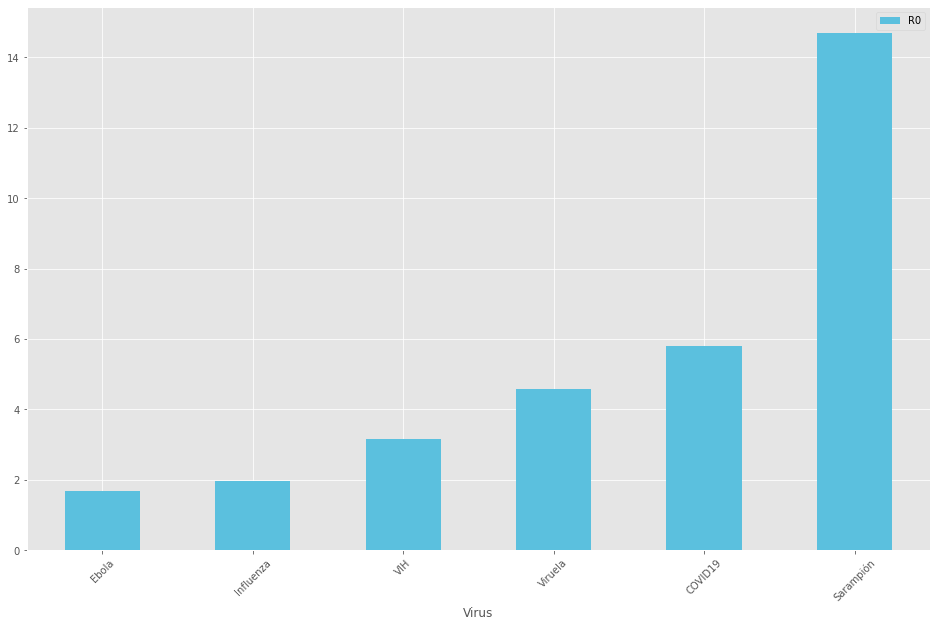

In [0]:
df_r0_bar=pd.DataFrame({"Virus":nombres_r0,"R0":r_cero})
df_r0_bar.sort_values(by="R0",inplace=True)
df_r0_bar.set_index("Virus",inplace=True)
df_r0_bar.plot.bar(figsize=(1.618*10,10),color="#5bc0de",rot=45)
plt.savefig("r0.png",dpi=1000)

In [0]:
multiseries=pd.read_excel("r0.xlsx")
multiseries.set_index("Tiempo t",inplace=True)
multiseries.columns

Index(['VIH', 'Viruela', 'Ebola', 'Influenza', 'COVID19', 'Sarampión'], dtype='object')

In [0]:
no_sarampion=multiseries.drop("Sarampión",axis=1)

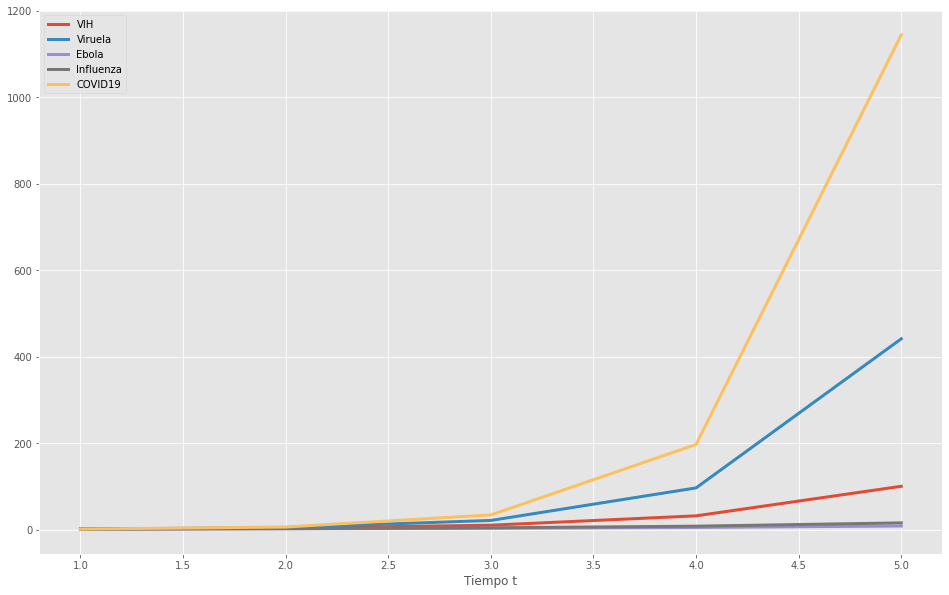

In [0]:
no_sarampion[0:5].plot(figsize=(10*1.618,10),lw=3)
plt.savefig("r0 sin samrampion.png",dpi=1000)

In [0]:
sampion_covid=multiseries[["COVID19","Sarampión"]]

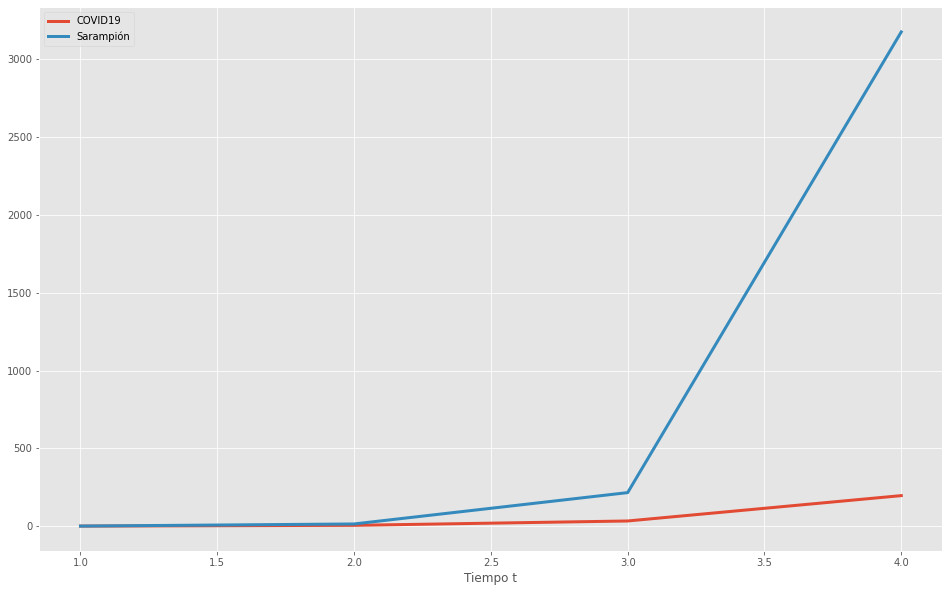

In [0]:
sampion_covid[0:4].plot(figsize=(10*1.618,10),lw=3)
plt.savefig("covid y sarampion.png",dpi=1000)